# Thresholding

Get ImageJ ready and prepare image for procesing 

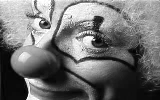

In [1]:
#@ImageJ ij
import net.imglib2.FinalInterval
import net.imglib2.interpolation.randomaccess.NLinearInterpolatorFactory

clown = ij.io().open("http://imagej.net/images/clown.png")

// crop image
scaleFactors = [0.5, 0.5, 1] // Reduce X and Y to 50%; leave C dimension alone.
interpolationStrategy = new NLinearInterpolatorFactory()

// crop to only one channel left
image = ij.op().run("scaleView", clown, scaleFactors, interpolationStrategy)
w = image.dimension(0); h = image.dimension(1)
slice = FinalInterval.createMinSize(0, 0, 0, w, h, 1)
threshImage = ij.op().run("crop", image, slice, true)

Ops has all the same global thresholding methods as ImageJ 1.x, as well as some local thresholding methods.

In [2]:
ij.op().ops().findAll{op ->
  op.startsWith("threshold.")
}.collect{op -> op[10..-1]}

apply
huang
ij1
intermodes
isoData
li
localBernsenThreshold
localContrastThreshold
localMeanThreshold
localMedianThreshold
localMidGreyThreshold


Let's check out the global thresholding algorithms:

In [ ]:


tHuang = ij.op().threshold().huang(threshImage)
tIJ1 = ij.op().threshold().ij1(threshImage) // ImageJ 1.x calls this "Default"
tIntermodes = ij.op().threshold().intermodes(threshImage)
tIsoData = ij.op().threshold().isoData(threshImage)
tLi = ij.op().threshold().li(threshImage)
tMaxEntropy = ij.op().threshold().maxEntropy(threshImage)
tMaxLikelihood = ij.op().threshold().maxLikelihood(threshImage)
tMean = ij.op().threshold().mean(threshImage)
tMinError = ij.op().threshold().minError(threshImage)
tMinimum = ij.op().threshold().minimum(threshImage)
tMoments = ij.op().threshold().moments(threshImage)
tOtsu = ij.op().threshold().otsu(threshImage)
tPercentile = ij.op().threshold().percentile(threshImage)
tRenyiEntropy = ij.op().threshold().renyiEntropy(threshImage)
tRosin = ij.op().threshold().rosin(threshImage)
tShanbhag = ij.op().threshold().shanbhag(threshImage)
tTriangle = ij.op().threshold().triangle(threshImage)
tYen = ij.op().threshold().yen(threshImage)

[
    [["huang":tHuang, "ij1":tIJ1, "intermodes":tIntermodes, "isodata":tIsoData, "li":tLi, "max entropy":tMaxEntropy]],
    [["max likelihood":tMaxLikelihood, "mean":tMean, "min error":tMinError, "minimum":tMinimum, "moments":tMoments, "otsu":tOtsu]],
    [["percentile":tPercentile, "renyi entropy":tRenyiEntropy, "rosin":tRosin, "shanbhag":tShanbhag, "triangle":tTriangle, "yen":tYen]]
]

Let's try some local thresholding. This is a bit more complex, because local thresholding algorithms typically need a neighborhood, and often some other secondary parameters. We will take the Bernsen algorithm for a spin:

In [ ]:
ij.op().help("threshold.localBernsenThreshold")

In [ ]:
import net.imglib2.algorithm.neighborhood.HyperSphereShape

// Secondary parameter values. These are wild guesses.
contrastThreshold = 10
halfMaxValue = 10

// Let's try with a variety of neighborhood radii and compare side-by-side.
import net.imglib2.type.logic.BitType
radii = [1, 3, 5, 8, 12, 15]
bernsenImages = [:]
for (radius in radii) {
  binaryImage = ij.op().run("create.img", threshImage, new BitType())
  ij.op().threshold().localBernsenThreshold(binaryImage, threshImage, new HyperSphereShape(radius),
                                            contrastThreshold, halfMaxValue)
  bernsenImages.put("radius " + radius, binaryImage)
}
[bernsenImages]

Nice illustration of how much better local thresholding can be, eh? The limited scope when thresholding each pixel can go a long way toward correcting for issues like uneven illumination.